In [2]:
!pip install fastai

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.6 MB 1.5 MB/s eta 0:00:02
   ---------------- ----------------------- 1.0/2.6 MB 1.8 MB/s eta 0:00:01
   -------------------- ------------------- 1.3/2.6 MB 1.9 MB/s eta 0:00:01
   ---------------------------- ----------- 1.8/2.6 MB 1.9 MB/s eta 0:00:01
   ------------------------------------ --- 2.4/2.6 MB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.7 MB 3.4 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.7 MB 2.5 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/11.7 MB 2.5 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.7 MB 2.1 MB/s eta 0:00:05
   ------- -----------------

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\user/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|████████████████████████████████████████████████████████████████████████████████████| 83.3M/83.3M [00:43<00:00, 2.01MB/s]


epoch,train_loss,valid_loss,error_rate,time


In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)/'images'

In [3]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path,get_image_files(path),valid_pct=0.2, seed = 42,label_func=is_cat, item_tfms=Resize(224))
learn = vision_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(1)


epoch,train_loss,valid_loss,error_rate,time
0,0.169128,0.028583,0.007442,09:15


epoch,train_loss,valid_loss,error_rate,time
0,0.063275,0.031083,0.008119,11:18


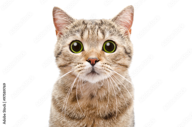

In [12]:
path = "C:\\Users\\user\\Downloads\\cat.jpg"
from fastai.vision.all import PILImage
img = PILImage.create(path)
img.to_thumb(192)

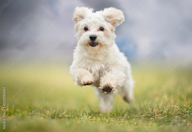

In [13]:
path1 = "C:\\Users\\user\\Downloads\\dog.jpg"
from fastai.vision.all import PILImage
img1 = PILImage.create(path1)
img1.to_thumb(192)

In [14]:

is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [15]:
is_cat,_,probs = learn.predict(img1)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000000


In [17]:
# another coding for the segmentation

In [23]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=get_image_files(path/"images"), label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)    )

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.179949,2.201718,00:25


epoch,train_loss,valid_loss,time
0,1.838479,1.617490,00:28
1,1.610435,1.228049,00:28
2,1.421374,1.117852,00:30
3,1.294331,0.976593,00:31
4,1.176512,0.899655,00:32
5,1.066000,0.793723,00:32
6,0.975078,0.791572,00:33
7,0.903477,0.780560,00:34


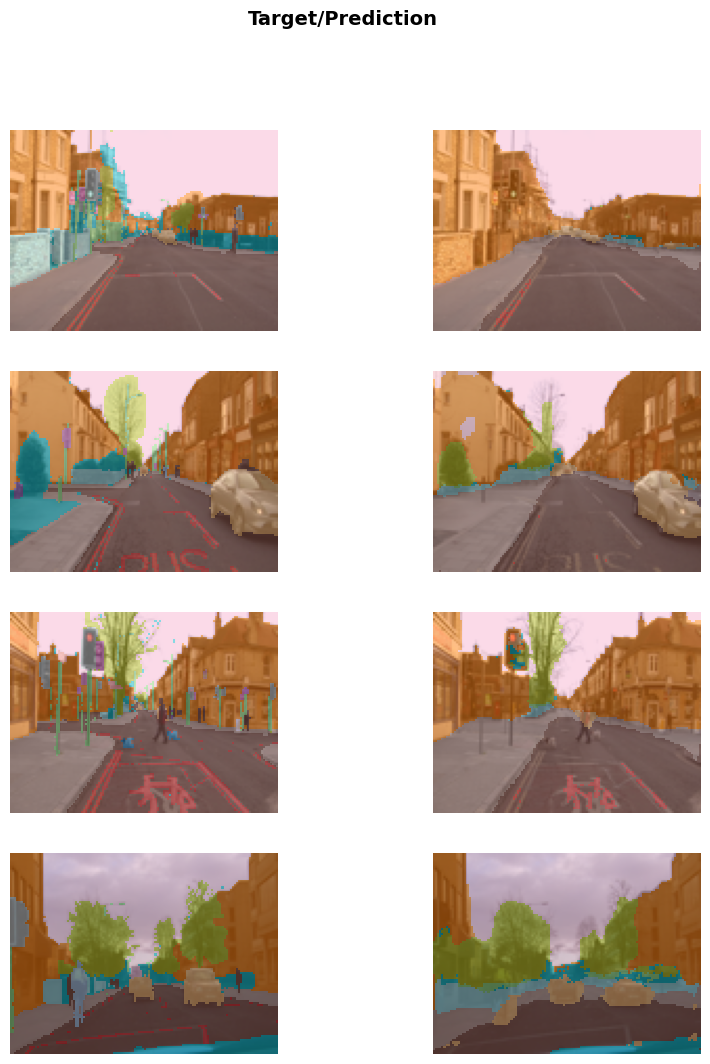

In [26]:
learn.show_results(max_n=4
                   , figsize=(10,12))

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

In [32]:
from fastai.text.all import *

In [35]:
from fastai.data.external import untar_data, URLs

# Ensure the dataset is downloaded and path is correct
path = untar_data(URLs.IMDB)
print(path)  # Check the path to make sure the data is there

C:\Users\user\.fastai\data\imdb


In [ ]:
""" This code is not working showing python couldn't handle parallel processing at the moment """
# from fastai.text.all import *

# dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
# learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
# learn.fine_tune(4, 1e-2)

In [ ]:
""" This code also didn't work showing end of file error couldn't download the whole compressed file.

In [2]:
import shutil
shutil.rmtree(untar_data(URLs.IMDB))

In [5]:
from fastai.text.all import *

# Force download to get a fresh copy of the dataset
path = untar_data(URLs.IMDB, force_download=True)


EOFError: Compressed file ended before the end-of-stream marker was reached

In [6]:

learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)


EOFError: Compressed file ended before the end-of-stream marker was reached

In [ ]:
learn.predict("I really liked that movie!")

In [7]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastai\tabular\core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


In [8]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.376028,0.361518,0.834152,00:05
1,0.361296,0.353895,0.836763,00:05
2,0.356884,0.348376,0.839066,00:04


In [9]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.489652,1.433642,00:00


epoch,train_loss,valid_loss,time
0,1.332282,1.383346,00:00
1,1.276258,1.229895,00:00
2,1.071960,0.944998,00:00
3,0.806836,0.779888,00:00
4,0.703090,0.724891,00:00
5,0.630621,0.713105,00:00
6,0.613676,0.701720,00:00
7,0.605580,0.697467,00:00
8,0.595827,0.695530,00:00
9,0.593185,0.695262,00:00


In [10]:
learn.show_results()
     

,userId,movieId,rating,rating_pred
0,41.0,57.0,5.0,4.265428
1,99.0,64.0,4.0,3.948879
2,33.0,60.0,5.0,3.923832
3,42.0,2.0,3.0,3.212083
4,27.0,75.0,4.0,3.843092
5,86.0,53.0,4.0,3.894559
6,100.0,93.0,5.0,3.994020
7,14.0,37.0,4.0,3.426306
8,6.0,45.0,4.5,4.135450
